# Trends in Global Temperature Average

Source: https://www.ncdc.noaa.gov/cag/time-series/global/globe/land_ocean/1/12/1880-2016

Units: Degrees Celsius

Import our dependencies:

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load the data, and get information about it:

In [53]:
temp_data = pd.read_csv("global_annual_mean_temp_anomalies_land-ocean_1880-2016.csv", header=0, sep=",")

print(temp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Year         137 non-null    int64  
 1   Anomaly      137 non-null    float64
 2   Actual Temp  137 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 3.3 KB
None


Sometimes, Pandas is not able to determine a data type for one or more columns.  These will have a Dtype of 'object'.  It looks like all of the types in this particular dataset were identified correctly, though, so we can continue.

The dataset includes a calculated Anomaly value.  We just want to work with Actual Temp (mean annual temperature) and Year, so we'll drop Anomaly from the dataframe:

In [54]:
temp_data = temp_data[temp_data.columns.difference(['Anomaly'])]

print(temp_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Actual Temp  137 non-null    float64
 1   Year         137 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 2.3 KB
None


Plotting the temperature over time, we see an overall trend of rising averages:

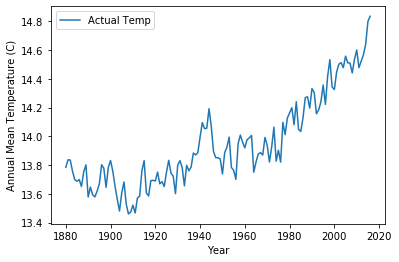

In [55]:
temp_data.plot(x = 'Year', y = 'Actual Temp')

plt.ylabel('Annual Mean Temperature (C)')

plt.show()

A positive correlation indicates two values increasing (or decreasing) together.  A negative correlation indicates that one value is increasing, while the other is decreasing.

There's a corresponding strong positive correlation between Actual Temp and Year, indicating a tendency for the average mean temperature to rise over time:

In [56]:
print(temp_data.corr())

             Actual Temp      Year
Actual Temp     1.000000  0.863268
Year            0.863268  1.000000


Something anomalous happens, starting in 1944.  An unexpected plummet in global average temperatures:

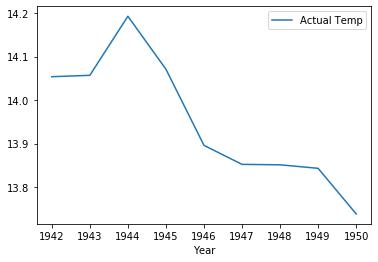

In [57]:
mid_20_cent = temp_data[(temp_data['Year'] >= 1942) & (temp_data['Year'] <= 1950)]

mid_20_cent.plot(x = 'Year', y = 'Actual Temp')

plt.show()

See that switch to a strong _negative_ correlation?  Therein lies the danger of small (and cherry-picked) sample sets.  If this was all we worked with, we'd assume a global cooling trend, not warming.

What triggered this?  You can read a detailed breakdown [here](https://www.newscientist.com/article/dn11639-climate-myths-the-cooling-after-1940-shows-co2-does-not-cause-warming/).

In [58]:
print(mid_20_cent.corr())

             Actual Temp      Year
Actual Temp     1.000000 -0.867544
Year           -0.867544  1.000000


Keeping in mind the dangers of small data sets, recent trends are alarming nonetheless:

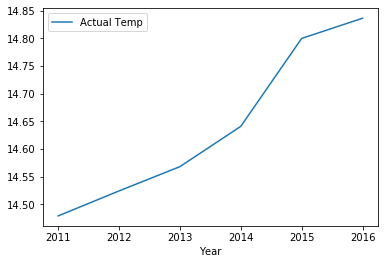

In [59]:
recent_trend = temp_data[(temp_data['Year'] >= 2011)]

recent_trend.plot(x = 'Year', y = 'Actual Temp')

plt.show()

Our positive correlation is much stronger, suggesting that warming is speeding up:

In [60]:
print(recent_trend.corr())

             Actual Temp      Year
Actual Temp     1.000000  0.974388
Year            0.974388  1.000000
